In [1]:
import numpy as np
import os
import glob
from complexcgr import FCGR
import pandas as pd
import random
import pandas as pd
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.layers import Input, Dense, Lambda, Dropout, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image
from keras.callbacks import ModelCheckpoint, CSVLogger
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt


In [2]:

# # Percorso delle immagini npy
# input_path = r'C:\Users\GENNY C\Desktop\Bioinformatica_covid\output\7mer\cladeO'
# output_path = os.path.join(input_path, 'img')

# # Creare la cartella di output
# os.makedirs(output_path, exist_ok=True)

# # Inizializzare l'oggetto FCGR
# fcgr = FCGR(k=7)

# # Funzione per caricare e salvare l'immagine
# def load_and_save_image(npy_file, output_folder):
#     # Caricare il file npy
#     chaos = np.load(npy_file)
    
#     #Ottenere il nome del file senza estensione
#     file_name = os.path.splitext(os.path.basename(npy_file))[0]
    
#     # Creare il percorso per salvare l'immagine
#     jpeg_file = os.path.join(output_folder, f'{file_name}_O.jpg')
    
#     #Salvare l'immagine
#     fcgr.save_img(chaos, jpeg_file)

# # Caricare e convertire ogni file
# for npy_file in glob.glob(os.path.join(input_path, '*.npy')):
#     load_and_save_image(npy_file, output_path)

# print("Conversione completata.")


In [3]:
# # Percorso delle immagini npy
# input_path = r'C:\Users\GENNY C\Desktop\Bioinformatica_covid\output\7mer\cladeS'
# output_path = os.path.join(input_path, 'img')

# # Creare la cartella di output se non esiste
# os.makedirs(output_path, exist_ok=True)

# # Inizializzare l'oggetto FCGR
# fcgr = FCGR(k=7)

# # Funzione per caricare e salvare l'immagine
# def load_and_save_image(npy_file, output_folder):
    
#     chaos = np.load(npy_file)
    
#     #Ottenere il nome del file senza estensione
#     file_name = os.path.splitext(os.path.basename(npy_file))[0]
    
#     #Creare il percorso per salvare l'immagine
#     jpeg_file = os.path.join(output_folder, f'{file_name}_S.jpg')
    
#     # Salvare l'immagine
#     fcgr.save_img(chaos, jpeg_file)

# #Caricare e convertire ogni file
# for npy_file in glob.glob(os.path.join(input_path, '*.npy')):
#     load_and_save_image(npy_file, output_path)

# print("Conversione completata.")

In [4]:

#Percorso delle immagini jpg
image_path = r'C:\Users\GENNY C\Desktop\Bioinformatica_covid\output\7mer\cladeO\img'
csv_file_path = os.path.join(image_path, 'images_list_with_labels.csv')

# Ottenere tutti i file jpg nella cartella
image_files = glob.glob(os.path.join(image_path, '*.jpg'))

# Creare una lista con i nomi dei file e la label 0
data = [{'Image_Name': os.path.basename(image_file), 'Label': 0} for image_file in image_files]

# Creare un DataFrame con i nomi delle immagini e delle label
df = pd.DataFrame(data)

# Salvare il DataFrame come CSV
df.to_csv(csv_file_path, index=False)

print(f"File CSV creato: {csv_file_path}")


File CSV creato: C:\Users\GENNY C\Desktop\Bioinformatica_covid\output\7mer\cladeO\img\images_list_with_labels.csv


In [5]:
csv_file_path = r'C:\Users\GENNY C\Desktop\Bioinformatica_covid\output\7mer\cladeO\img\images_list_with_labels.csv'
csv_file_path1 = r'C:\Users\GENNY C\Desktop\Bioinformatica_covid\output\7mer\cladeS\img\images_list_with_labels.csv'

df1 = pd.read_csv(csv_file_path)
df2 = pd.read_csv(csv_file_path1)

df_merge = pd.concat([df1, df2])
output_csv_path = r'C:\Users\GENNY C\Desktop\Bioinformatica_covid\df_completo.csv'

# Salvare il DataFrame unito come un nuovo file CSV
df_merge.to_csv(output_csv_path, index=False)

In [6]:
# percorso dei file CSV
csv_file_path = r'C:\Users\GENNY C\Desktop\Bioinformatica_covid\df_completo.csv'
cladeO_path = r'C:\Users\GENNY C\Desktop\Bioinformatica_covid\output\7mer\cladeO\img'
cladeS_path = r'C:\Users\GENNY C\Desktop\Bioinformatica_covid\output\7mer\cladeS\img'


df = pd.read_csv(csv_file_path)

# Funzione per caricare le immagini e convertirle in array
def load_images(image_names, labels, cladeO_path, cladeS_path):
    images = []
    for image_name, label in zip(image_names, labels):
        if label == 0:
            image_path = os.path.join(cladeO_path, image_name)
        else:
            image_path = os.path.join(cladeS_path, image_name)
        image = load_img(image_path, target_size=(128, 128))
        image_array = img_to_array(image)
        images.append(image_array)
    return np.array(images)

# Carica le immagini
X = load_images(df['Image_Name'], df['Label'], cladeO_path, cladeS_path)
y = df['Label'].values



In [7]:
print(X)
print(len(y))

[[[[250. 250. 250.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [232. 232. 232.]
   [229. 229. 229.]
   [251. 251. 251.]]

  [[252. 252. 252.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [202. 202. 202.]
   [255. 255. 255.]
   [229. 229. 229.]]

  [[252. 252. 252.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [207. 207. 207.]
   [120. 120. 120.]
   [194. 194. 194.]]

  ...

  [[252. 252. 252.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [157. 157. 157.]
   [207. 207. 207.]
   [220. 220. 220.]]

  [[250. 250. 250.]
   [253. 253. 253.]
   [253. 253. 253.]
   ...
   [187. 187. 187.]
   [219. 219. 219.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [250. 250. 250.]
   ...
   [140. 140. 140.]
   [233. 233. 233.]
   [213. 213. 213.]]]


 [[[251. 251. 251.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [211. 211. 211.]
   [248. 248. 248.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [189. 189. 189.]
 

In [8]:
def prepare_targets(y):
    
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(y)
    #print(integer_encoded)
    # binary encode
    onehot_encoder = OneHotEncoder(sparse_output=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    
    #print(onehot_encoded)
    #y_train_enc = onehot_encoded.transform(y_train)
    #y_test_enc = onehot_encoded.transform(y_test)
    return onehot_encoded

Y = prepare_targets(y)
print(Y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [9]:
# Dividere il dataset in train e test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
np.shape(X_train)
np.shape(y_train)

(43147, 2)

In [10]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from keras.regularizers import l2


def get_CNN_model():
    latent_dim = 100
    hidden_activation = "relu"
    kmer = 7  
    n_chromosomes = 3  

   
    rows = 128
    cols = 128

   
    level = 3
    kernel_size = 2 ** level
    stride = 2 ** level

    input_shape = (rows, cols, n_chromosomes)
    
    
    n_classes = 2

   
    model = Sequential()
    model.add(Conv2D(filters=4, kernel_size=kernel_size, strides=stride, activation="relu", padding="same", input_shape=input_shape))
    model.add(tf.keras.layers.BatchNormalization(axis=-1))
    model.add(Conv2D(filters=4, kernel_size=kernel_size, strides=stride, activation="relu", padding="same"))
    model.add(tf.keras.layers.BatchNormalization(axis=-1))
    model.add(Conv2D(filters=4, kernel_size=kernel_size, strides=stride, activation="relu", padding="same"))
    model.add(tf.keras.layers.BatchNormalization(axis=-1))
    model.add(Conv2D(filters=4, kernel_size=kernel_size, strides=stride, activation="relu", padding="same"))
    model.add(tf.keras.layers.BatchNormalization(axis=-1))
    model.add(Conv2D(filters=4, kernel_size=kernel_size, strides=stride, activation="relu", padding="same"))
    model.add(tf.keras.layers.BatchNormalization(axis=-1))
    model.add(Conv2D(filters=4, kernel_size=kernel_size, strides=stride, activation="relu", padding="same"))
    model.add(tf.keras.layers.BatchNormalization(axis=-1))
    model.add(Conv2D(filters=4, kernel_size=kernel_size, strides=stride, activation="relu", padding="same"))
    model.add(tf.keras.layers.BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2 ** level, 2 ** level), strides=stride, padding='same'))
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))

    optimizer = Adam(learning_rate=0.01)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    model.summary()

    return model

In [11]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
import os


gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

tf.compat.v1.disable_eager_execution()

# Parametri di addestramento
batch_size = 64
epochs = 25
output_dir = 'C:/Users/GENNY C/Desktop/Bioinformatica_covid/Model'
os.makedirs(output_dir, exist_ok=True)

# Percorsi per salvare i pesi e il modello
model_weights_path = os.path.join(output_dir, 'best_model_weights3.h5')
model_path = os.path.join(output_dir, 'trained_model3.h5')

# Callback per il checkpoint dei pesi e il logger CSV
model_checkpoint = ModelCheckpoint(model_weights_path, monitor='val_accuracy', save_best_only=True, save_weights_only=True, mode='max', verbose=1)
csv_logger = CSVLogger(os.path.join(output_dir, 'training.log'))

# Definisci il modello
CNN = get_CNN_model()

# Addestramento del modello
history = CNN.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_train, y_train), callbacks=[model_checkpoint, csv_logger])

# Valutazione del modello
loss, accuracy = CNN.evaluate(X_test, y_test)

# Salva l'intero modello
CNN.save(model_path)


1 Physical GPUs, 1 Logical GPUs
Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 4)         772       
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 4)        16        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 4)           1028      
                                                                 
 batch_normalization_1 (Batc  (None, 2, 2, 4)          16        
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 4)           1028      
                  

c:\Anaconda\envs\bio\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates



Epoch 1: val_accuracy improved from -inf to 0.69942, saving model to C:/Users/GENNY C/Desktop/Bioinformatica_covid/Model\best_model_weights3.h5
43147/43147 [==============================] - 15s 357us/sample - loss: 0.1997 - accuracy: 0.9167 - val_loss: 0.7655 - val_accuracy: 0.6994
Epoch 2/25
43136/43147 [============================>.] - ETA: 0s - loss: 0.0771 - accuracy: 0.9749
Epoch 2: val_accuracy improved from 0.69942 to 0.70135, saving model to C:/Users/GENNY C/Desktop/Bioinformatica_covid/Model\best_model_weights3.h5
43147/43147 [==============================] - 11s 249us/sample - loss: 0.0771 - accuracy: 0.9749 - val_loss: 2.0950 - val_accuracy: 0.7013
Epoch 3/25
43072/43147 [============================>.] - ETA: 0s - loss: 0.0648 - accuracy: 0.9793
Epoch 3: val_accuracy improved from 0.70135 to 0.70404, saving model to C:/Users/GENNY C/Desktop/Bioinformatica_covid/Model\best_model_weights3.h5
43147/43147 [==============================] - 10s 243us/sample - loss: 0.0648 - 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      7672
           1       0.96      0.99      0.98      3115

    accuracy                           0.99     10787
   macro avg       0.98      0.99      0.98     10787
weighted avg       0.99      0.99      0.99     10787

Confusion Matrix:
 [[7543  129]
 [  24 3091]]
Accuracy: 0.9858162603133401
F1 Score: 0.9858849406030645
Precision: 0.9861753496581308
Recall: 0.9858162603133401


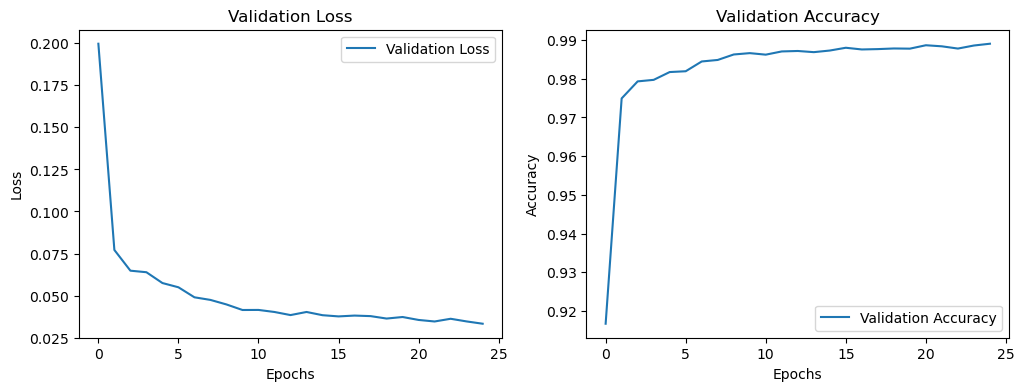

In [13]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import pandas as pd

# Predizione sui dati di test
y_pred = CNN.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calcolo delle metriche
print("Classification Report:\n", classification_report(y_true, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_classes))
print("Accuracy:", accuracy_score(y_true, y_pred_classes))
print("F1 Score:", f1_score(y_true, y_pred_classes, average='weighted'))
print("Precision:", precision_score(y_true, y_pred_classes, average='weighted'))
print("Recall:", recall_score(y_true, y_pred_classes, average='weighted'))

# Carica la cronologia dell'addestramento dal logger CSV
history_path = os.path.join(output_dir, 'training.log')
history = pd.read_csv(history_path)

# Plot della curva di loss (solo training)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['epoch'], history['loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()

# Plot della curva di accuratezza (solo training)
plt.subplot(1, 2, 2)
plt.plot(history['epoch'], history['accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.show()
